# Drifting Upstream: Exploratory Data Analysis

## Load Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

## Load Data

In [2]:
df = pd.read_csv('spotify_2023_cleaned.csv', index_col=0)

In [3]:
df.head()

track_name    artist(s)_name  artist_count  year  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2  2023   
1                                 LALA       Myke Towers             1  2023   
2                              vampire    Olivia Rodrigo             1  2023   
3                         Cruel Summer      Taylor Swift             1  2019   
4                       WHERE SHE GOES         Bad Bunny             1  2023   

   month  day  in_spotify_playlists  in_spotify_charts    streams  \
0      7   14                   553                147  141381703   
1      3   23                  1474                 48  133716286   
2      6   30                  1397                113  140003974   
3      8   23                  7858                100  800840817   
4      5   18                  3133                 50  303236322   

   in_apple_playlists  ...  key_C  key_C#  key_D  key_D#  key_E  key_F  \
0                  43  ...      0       0      0       0      0      0   
1                  48  ...      0       0      0       0      0      0   
2                  94  ...      0       0      0       0      0      1   
3                 116  ...      0       0      0       0      0      0   
4                  84  ...      0       0      0       0      0      0   

   key_F#  key_G  key_G#  release_date  
0       0      0       0    2023-07-14  
1       1      0       0    2023-03-23  
2       0      0       0    2023-06-30  
3       0      0       0    2019-08-23  
4       0      0       0    2023-05-18  

[5 rows x 36 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 944
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            945 non-null    object 
 1   artist(s)_name        945 non-null    object 
 2   artist_count          945 non-null    int64  
 3   year                  945 non-null    int64  
 4   month                 945 non-null    int64  
 5   day                   945 non-null    int64  
 6   in_spotify_playlists  945 non-null    int64  
 7   in_spotify_charts     945 non-null    int64  
 8   streams               945 non-null    int64  
 9   in_apple_playlists    945 non-null    int64  
 10  in_apple_charts       945 non-null    int64  
 11  in_deezer_playlists   945 non-null    int64  
 12  in_deezer_charts      945 non-null    int64  
 13  in_shazam_charts      895 non-null    float64
 14  bpm                   945 non-null    int64  
 15  mode                  945 no

### Additional Cleaning

We have quite a few columns to work with. We want to find a healthy balance of having *enough* information to work with, but not *so much* information that we muddy up our analysis. To start, let's go ahead and be selective to only include columns that don't have missing values. Both the 'in_shazam_charts' column and the original key column (which was the basis of our 12 distinct keys columns) include 50 and 95 missing values respectively. As there isn't a reasonable way to fill these values in without a lot of manual searching, let's go ahead and remove these columns. Moreover, we saw while data wrangling that some of the key values were inconsistent with the actual song key, so we can't be sure to trust this column anyways. While our analysis focuses on music features that correlate with stream count, our domain knowledge informs us that the key that the song is in might be arbitrary to listener preferences, as opposed to more discernable qualities such as danceability, valence, etc. (All that one-hot encoding for nothing!... sigh). Furthermore, it will help to keep our aim focused and less convoluted if we train our models on several definitive variables without cluttering things up with too much extra noise.

In [5]:
df = df.drop(['in_shazam_charts', 'key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#'], axis =1)

In [6]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
year                     int64
month                    int64
day                      int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
bpm                      int64
mode                     int64
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
release_date            object
dtype: object

In [7]:
df.describe().T

count          mean           std        min  \
artist_count          945.0  1.558730e+00  8.943031e-01        1.0   
year                  945.0  2.018387e+03  1.064639e+01     1942.0   
month                 945.0  6.028571e+00  3.560647e+00        1.0   
day                   945.0  1.393545e+01  9.191297e+00        1.0   
in_spotify_playlists  945.0  5.230760e+03  7.923500e+03       31.0   
in_spotify_charts     945.0  1.208360e+01  1.962612e+01        0.0   
streams               945.0  5.156784e+08  5.681818e+08  1365184.0   
in_apple_playlists    945.0  6.830794e+01  8.663513e+01        0.0   
in_apple_charts       945.0  5.215344e+01  5.063617e+01        0.0   
in_deezer_playlists   945.0  3.882000e+02  1.134838e+03        0.0   
in_deezer_charts      945.0  2.679365e+00  6.053246e+00        0.0   
bpm                   945.0  1.225153e+02  2.807787e+01       65.0   
mode                  945.0  5.756614e-01  4.945039e-01        0.0   
danceability_%        945.0  6.701693e+01  1.463901e+01       23.0   
valence_%             945.0  5.138413e+01  2.353103e+01        4.0   
energy_%              945.0  6.422857e+01  1.659681e+01        9.0   
acousticness_%        945.0  2.719365e+01  2.605746e+01        0.0   
instrumentalness_%    945.0  1.569312e+00  8.422736e+00        0.0   
liveness_%            945.0  1.819788e+01  1.371741e+01        3.0   
speechiness_%         945.0  1.015661e+01  9.939905e+00        2.0   

                              25%          50%          75%           max  
artist_count                  1.0          1.0          2.0  8.000000e+00  
year                       2020.0       2022.0       2022.0  2.023000e+03  
month                         3.0          6.0          9.0  1.200000e+01  
day                           6.0         13.0         22.0  3.100000e+01  
in_spotify_playlists        880.0       2226.0       5724.0  5.289800e+04  
in_spotify_charts             0.0          3.0         16.0  1.470000e+02  
streams               142095275.0  290833204.0  673801126.0  3.703895e+09  
in_apple_playlists           14.0         34.0         88.0  6.720000e+02  
in_apple_charts               7.0         39.0         87.0  2.750000e+02  
in_deezer_playlists          13.0         44.0        169.0  1.236700e+04  
in_deezer_charts              0.0          0.0          2.0  5.800000e+01  
bpm                          99.0        121.0        140.0  2.060000e+02  
mode                          0.0          1.0          1.0  1.000000e+00  
danceability_%               57.0         69.0         78.0  9.600000e+01  
valence_%                    32.0         51.0         70.0  9.700000e+01  
energy_%                     53.0         66.0         77.0  9.700000e+01  
acousticness_%                6.0         18.0         43.0  9.700000e+01  
instrumentalness_%            0.0          0.0          0.0  9.100000e+01  
liveness_%                   10.0         12.0         23.0  9.700000e+01  
speechiness_%                 4.0          6.0         11.0  6.400000e+01

## Explore the Data

### Overview of Distributions

Let's begin our exploratory analysis by looking at distributions across all of the features, as well as our target variable: streams.

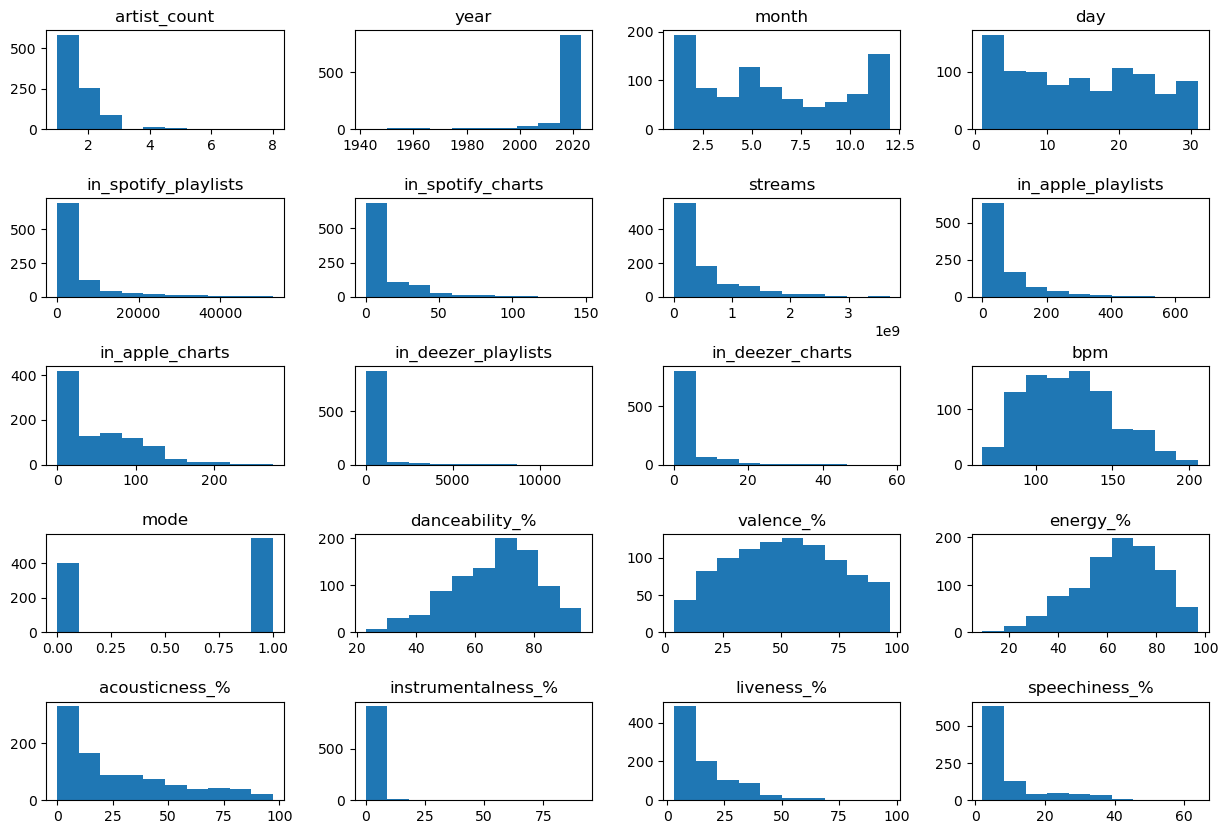

In [8]:
df.hist(figsize=(15,10), grid=False)
plt.subplots_adjust(hspace=0.7);

The majority of these historgrams are right skewed, indicating that most of the songs in our dataset cluster around lower values relative to some higher outliers. Exceptions include valence, which resembles a rather normal distribution, and danceability and energy which seem to be somewhat left skewed. We can also see that the release year is extremely left skewed, with the majority of the songs having been released in the past few years. This bodes well for our upcoming releases. It is also apparent that the most popular release dates for songs in the dataset were at the beginning of a month, and either at the beginning or end of a year. We may want to consider holding our releases til December, or even until January 1, 2025. Do these times tend to correlate with more streams?

We can also see that most songs consist of only one to a few artists, though we don't anticipate that artist count will be particularly relevant in predicting stream count. After all, we're mostly interested in the musical aspects of the song. Nonetheless, we'll leave all fields in for now as we further construct our understanding of how the variables interrelate.

We can also look at some box plots to examine the median, inter quartile range (IQR), and which features have the most outliers.

In [76]:
def boxplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=2, hspace=0.2)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.boxplot(x=col, data=df)
        ax.set(xlabel=col, ylabel='')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function adapeted from Capstone 1 exploratory analysis

In [77]:
features = [x for x in df.columns if x in ['artist_count', 'year', 'month', 'day', 'in_spotify_playlists', 'in_spotify_charts', \
                                                 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', \
                                                 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', \
                                                 'instrumentalness_%', 'liveness_%', 'speechiness_%']]

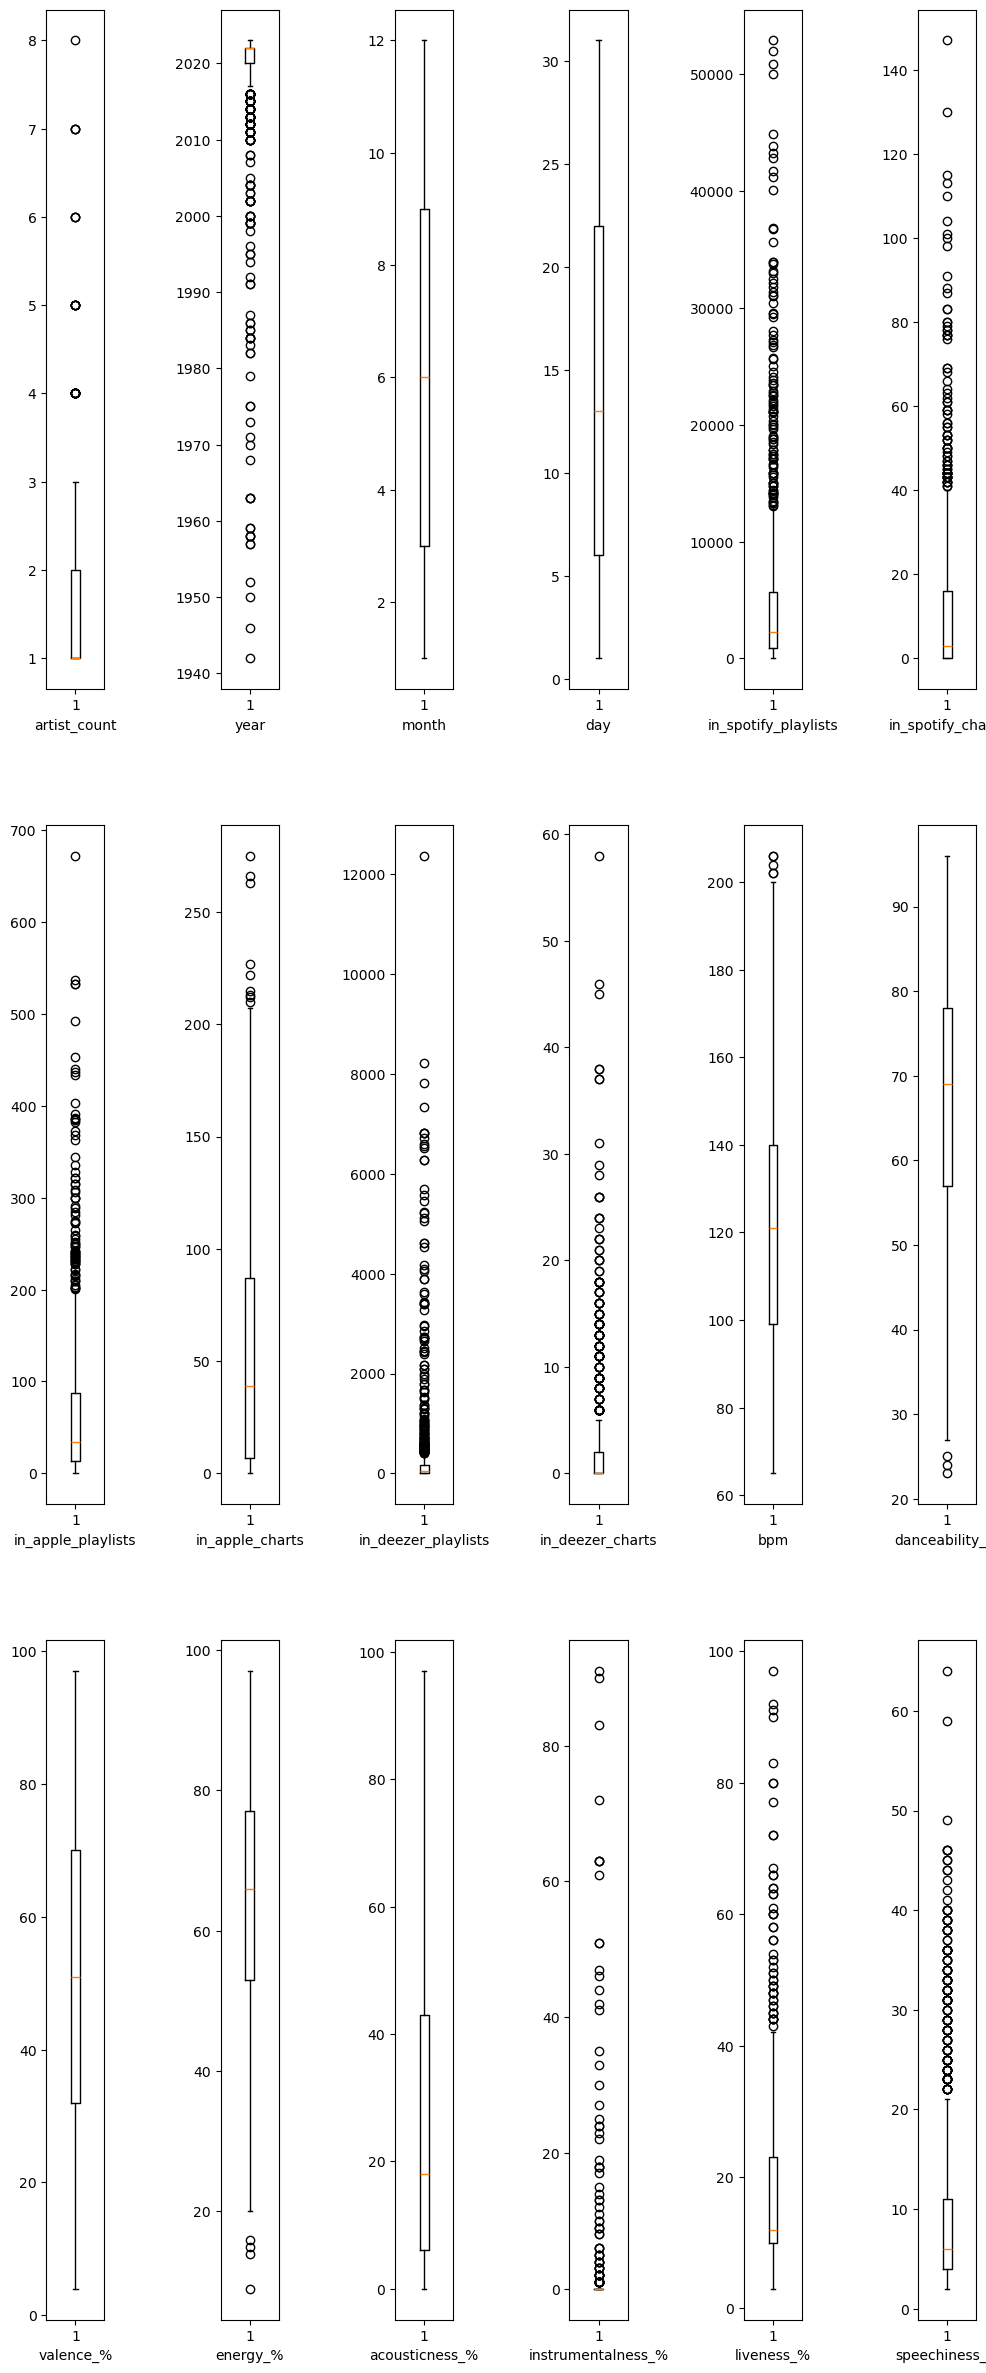

In [78]:
boxplots(features, ncol=6, figsize=(12, 30))

This reiterates what was apparent from our histograms: certain features have an abundance of outliers. (Is that an oxymoron?). Particularly, instrumentalness, liveness, and speechiness all have relatively smaller IQR's than the other music features, and each have a noticeable number of outliers that are greater than the IQR. This illustrates that though the top-streamed songs of 2023 tended toward a lower degree of instrumentalness, liveness, and speechiness, certain songs with higher levels of these features were also highly streamed. All the same, for our purposes of selecting songs that are most likely to garner more streams, we probably want to follow the trend of the majority rather than the outliers.

The chart and playlist features also have a number of outliers that are above the IQR, demonstrating that some songs in our dataset saw significantly higher playlist and chart presence than the majority. Do these songs also tend to have significantly higher stream counts? If so, we'll want to be sure to push playlisting and charting of our selected songs. (Domain insight: yes, indeed getting songs included in playlists is an effective way to accumulate more streams, as is reflected in these data).

We can also see that songs that were released as early as the 1940s were top-streamed songs in 2023, with a handful of songs from the subsequent decades making it into the dataset. The increasing clustering of outliers toward the IQR shows that the songs in the data set tend to be more recent releases, particularly songs from the past few years.

Let's also remember to look at the distribution of the 'mode' feature, that is, whether the song is Major or minor.

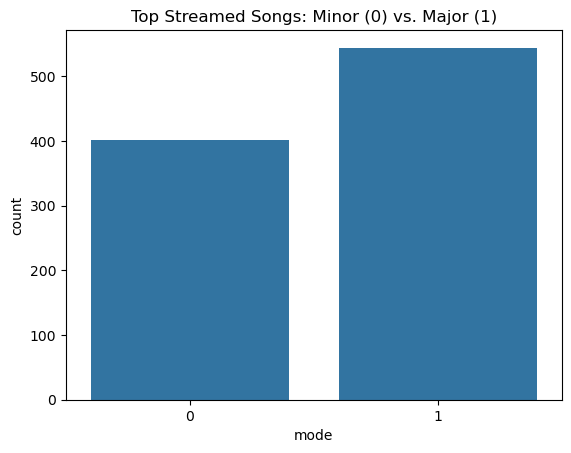

In [79]:
sns.countplot(data=df, x='mode');
plt.title('Top Streamed Songs: Minor (0) vs. Major (1)');

In [80]:
print(f"{round(len(df[df['mode'] == 1])/len(df)*100)}% of the songs are Major.")
print(f"{round(len(df[df['mode'] == 0])/len(df)*100)}% of the songs are minor.")

58% of the songs are Major.
42% of the songs are minor.


It appears that there is a fairly even balance between Major and minor keys in the dataset, though Major is the majority.

### Correlations

Now that we've a sense for how our variables are distributed, let's examine how they correlate with one another.

In [81]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'release_date'],
      dtype='object')

In [82]:
df_int_features = df[['artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%']]

In [83]:
df_int_features.corr()

artist_count      year     month       day  \
artist_count              1.000000  0.103083  0.040557 -0.011717   
year                      0.103083  1.000000  0.056575  0.160019   
month                     0.040557  0.056575  1.000000  0.074957   
day                      -0.011717  0.160019  0.074957  1.000000   
in_spotify_playlists     -0.103574 -0.419048 -0.104517 -0.080089   
in_spotify_charts        -0.020770  0.064318 -0.049558  0.022457   
streams                  -0.136893 -0.247763 -0.022698  0.009642   
in_apple_playlists       -0.054015 -0.219049  0.000559  0.026642   
in_apple_charts          -0.092285 -0.053394 -0.022533  0.013191   
in_deezer_playlists      -0.072494 -0.326339 -0.088018 -0.085158   
in_deezer_charts         -0.005617  0.093388 -0.007340  0.074397   
bpm                      -0.037973 -0.003822 -0.038727 -0.028235   
danceability_%            0.215240  0.193338 -0.045350  0.049151   
valence_%                 0.128977 -0.056288 -0.119433  0.044583   
energy_%                  0.134841  0.110535 -0.083698  0.053241   
acousticness_%           -0.101792 -0.133029  0.056023 -0.005671   
instrumentalness_%       -0.050290 -0.014641  0.032448  0.015377   
liveness_%                0.046243 -0.016121 -0.010179  0.001059   
speechiness_%             0.131003  0.131301  0.038454 -0.019114   

                      in_spotify_playlists  in_spotify_charts   streams  \
artist_count                     -0.103574          -0.020770 -0.136893   
year                             -0.419048           0.064318 -0.247763   
month                            -0.104517          -0.049558 -0.022698   
day                              -0.080089           0.022457  0.009642   
in_spotify_playlists              1.000000           0.163255  0.790111   
in_spotify_charts                 0.163255           1.000000  0.246114   
streams                           0.790111           0.246114  1.000000   
in_apple_playlists                0.707696           0.231738  0.772846   
in_apple_charts                   0.270575           0.550940  0.322217   
in_deezer_playlists               0.826300           0.087386  0.598273   
in_deezer_charts                  0.143836           0.599563  0.229407   
bpm                              -0.019128           0.035408 -0.002077   
danceability_%                   -0.108645           0.029960 -0.108141   
valence_%                        -0.021071           0.035314 -0.041051   
energy_%                          0.035201           0.084074 -0.024760   
acousticness_%                   -0.066833          -0.057962 -0.005894   
instrumentalness_%               -0.027179          -0.009048 -0.044275   
liveness_%                       -0.046932          -0.046394 -0.051115   
speechiness_%                    -0.091041          -0.082736 -0.113346   

                      in_apple_playlists  in_apple_charts  \
artist_count                   -0.054015        -0.092285   
year                           -0.219049        -0.053394   
month                           0.000559        -0.022533   
day                             0.026642         0.013191   
in_spotify_playlists            0.707696         0.270575   
in_spotify_charts               0.231738         0.550940   
streams                         0.772846         0.322217   
in_apple_playlists              1.000000         0.413571   
in_apple_charts                 0.413571         1.000000   
in_deezer_playlists             0.471434         0.172845   
in_deezer_charts                0.368561         0.381797   
bpm                             0.025283         0.029140   
danceability_%                 -0.027302        -0.026144   
valence_%                       0.058632         0.048686   
energy_%                        0.054835         0.107375   
acousticness_%                 -0.065556        -0.080373   
instrumentalness_%             -0.056243        -0.011042   
liveness_%                     -0.048904        -0.017547   
s

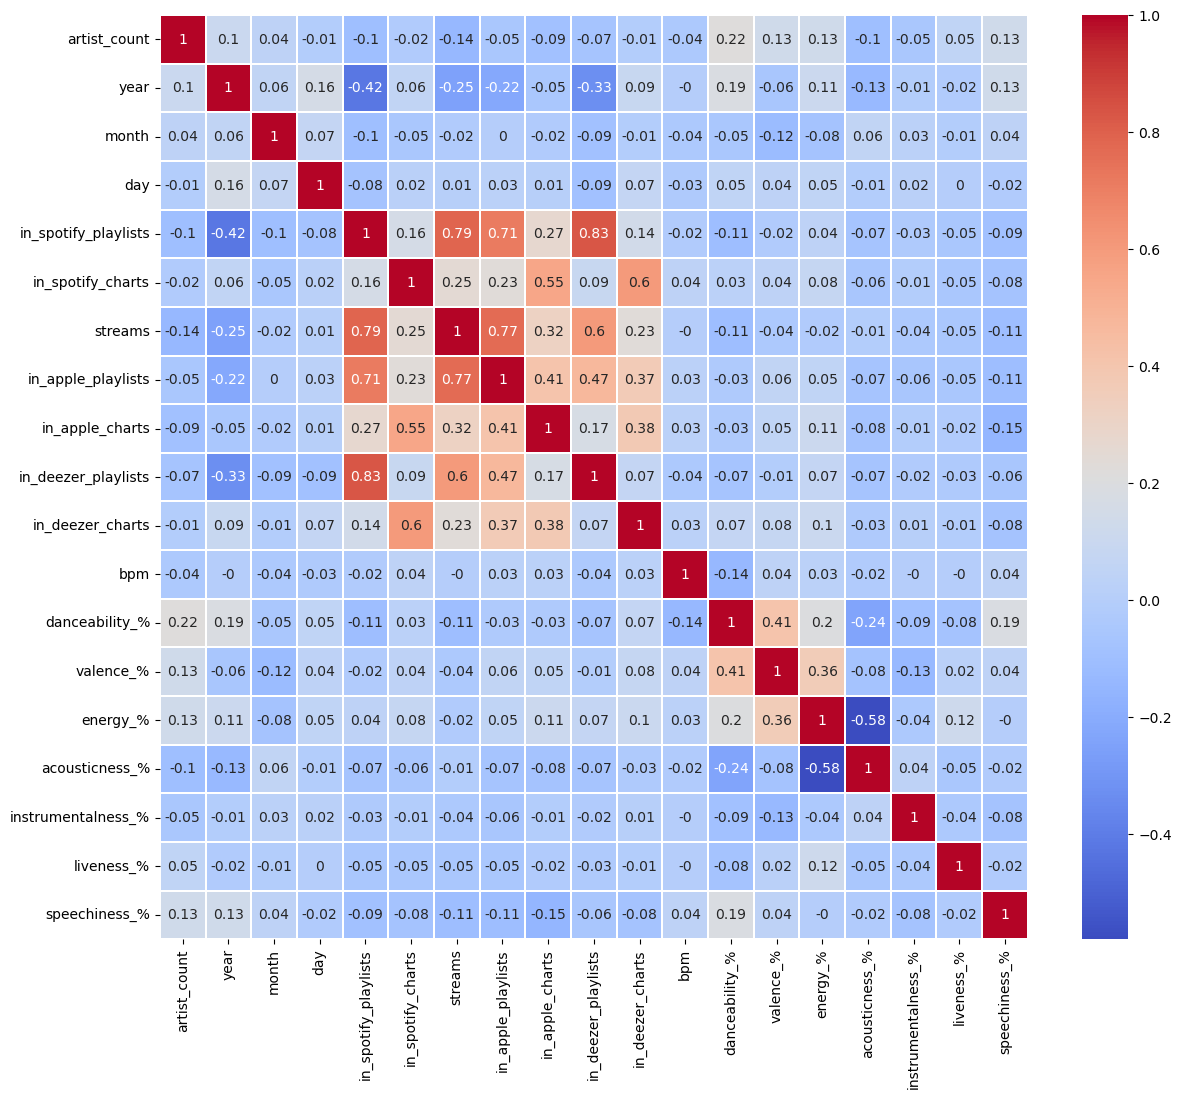

In [84]:
plt.figure(figsize=(14,12))
sns.heatmap(round(df_int_features.corr(),2),linewidths=.1,cmap='coolwarm', annot=True)
plt.yticks(rotation=0);

It seems that many of the linear correlations are slight. We can see that valence has a noticeable positive correlation with both danceability and energy, and that energy and acousticness are negatively correlated. Interestingly, all music features bear a slight negative correlation with streams. It is also apparent that streams most strongestly correlates with playlists, and streams positively correlate with charts. As expected, streams negatively correlate with year, which again, basically goes to show that the top streamed songs of 2023 were mostly songs that had come out recently.

We can further visualize these correlations with scatterplots.

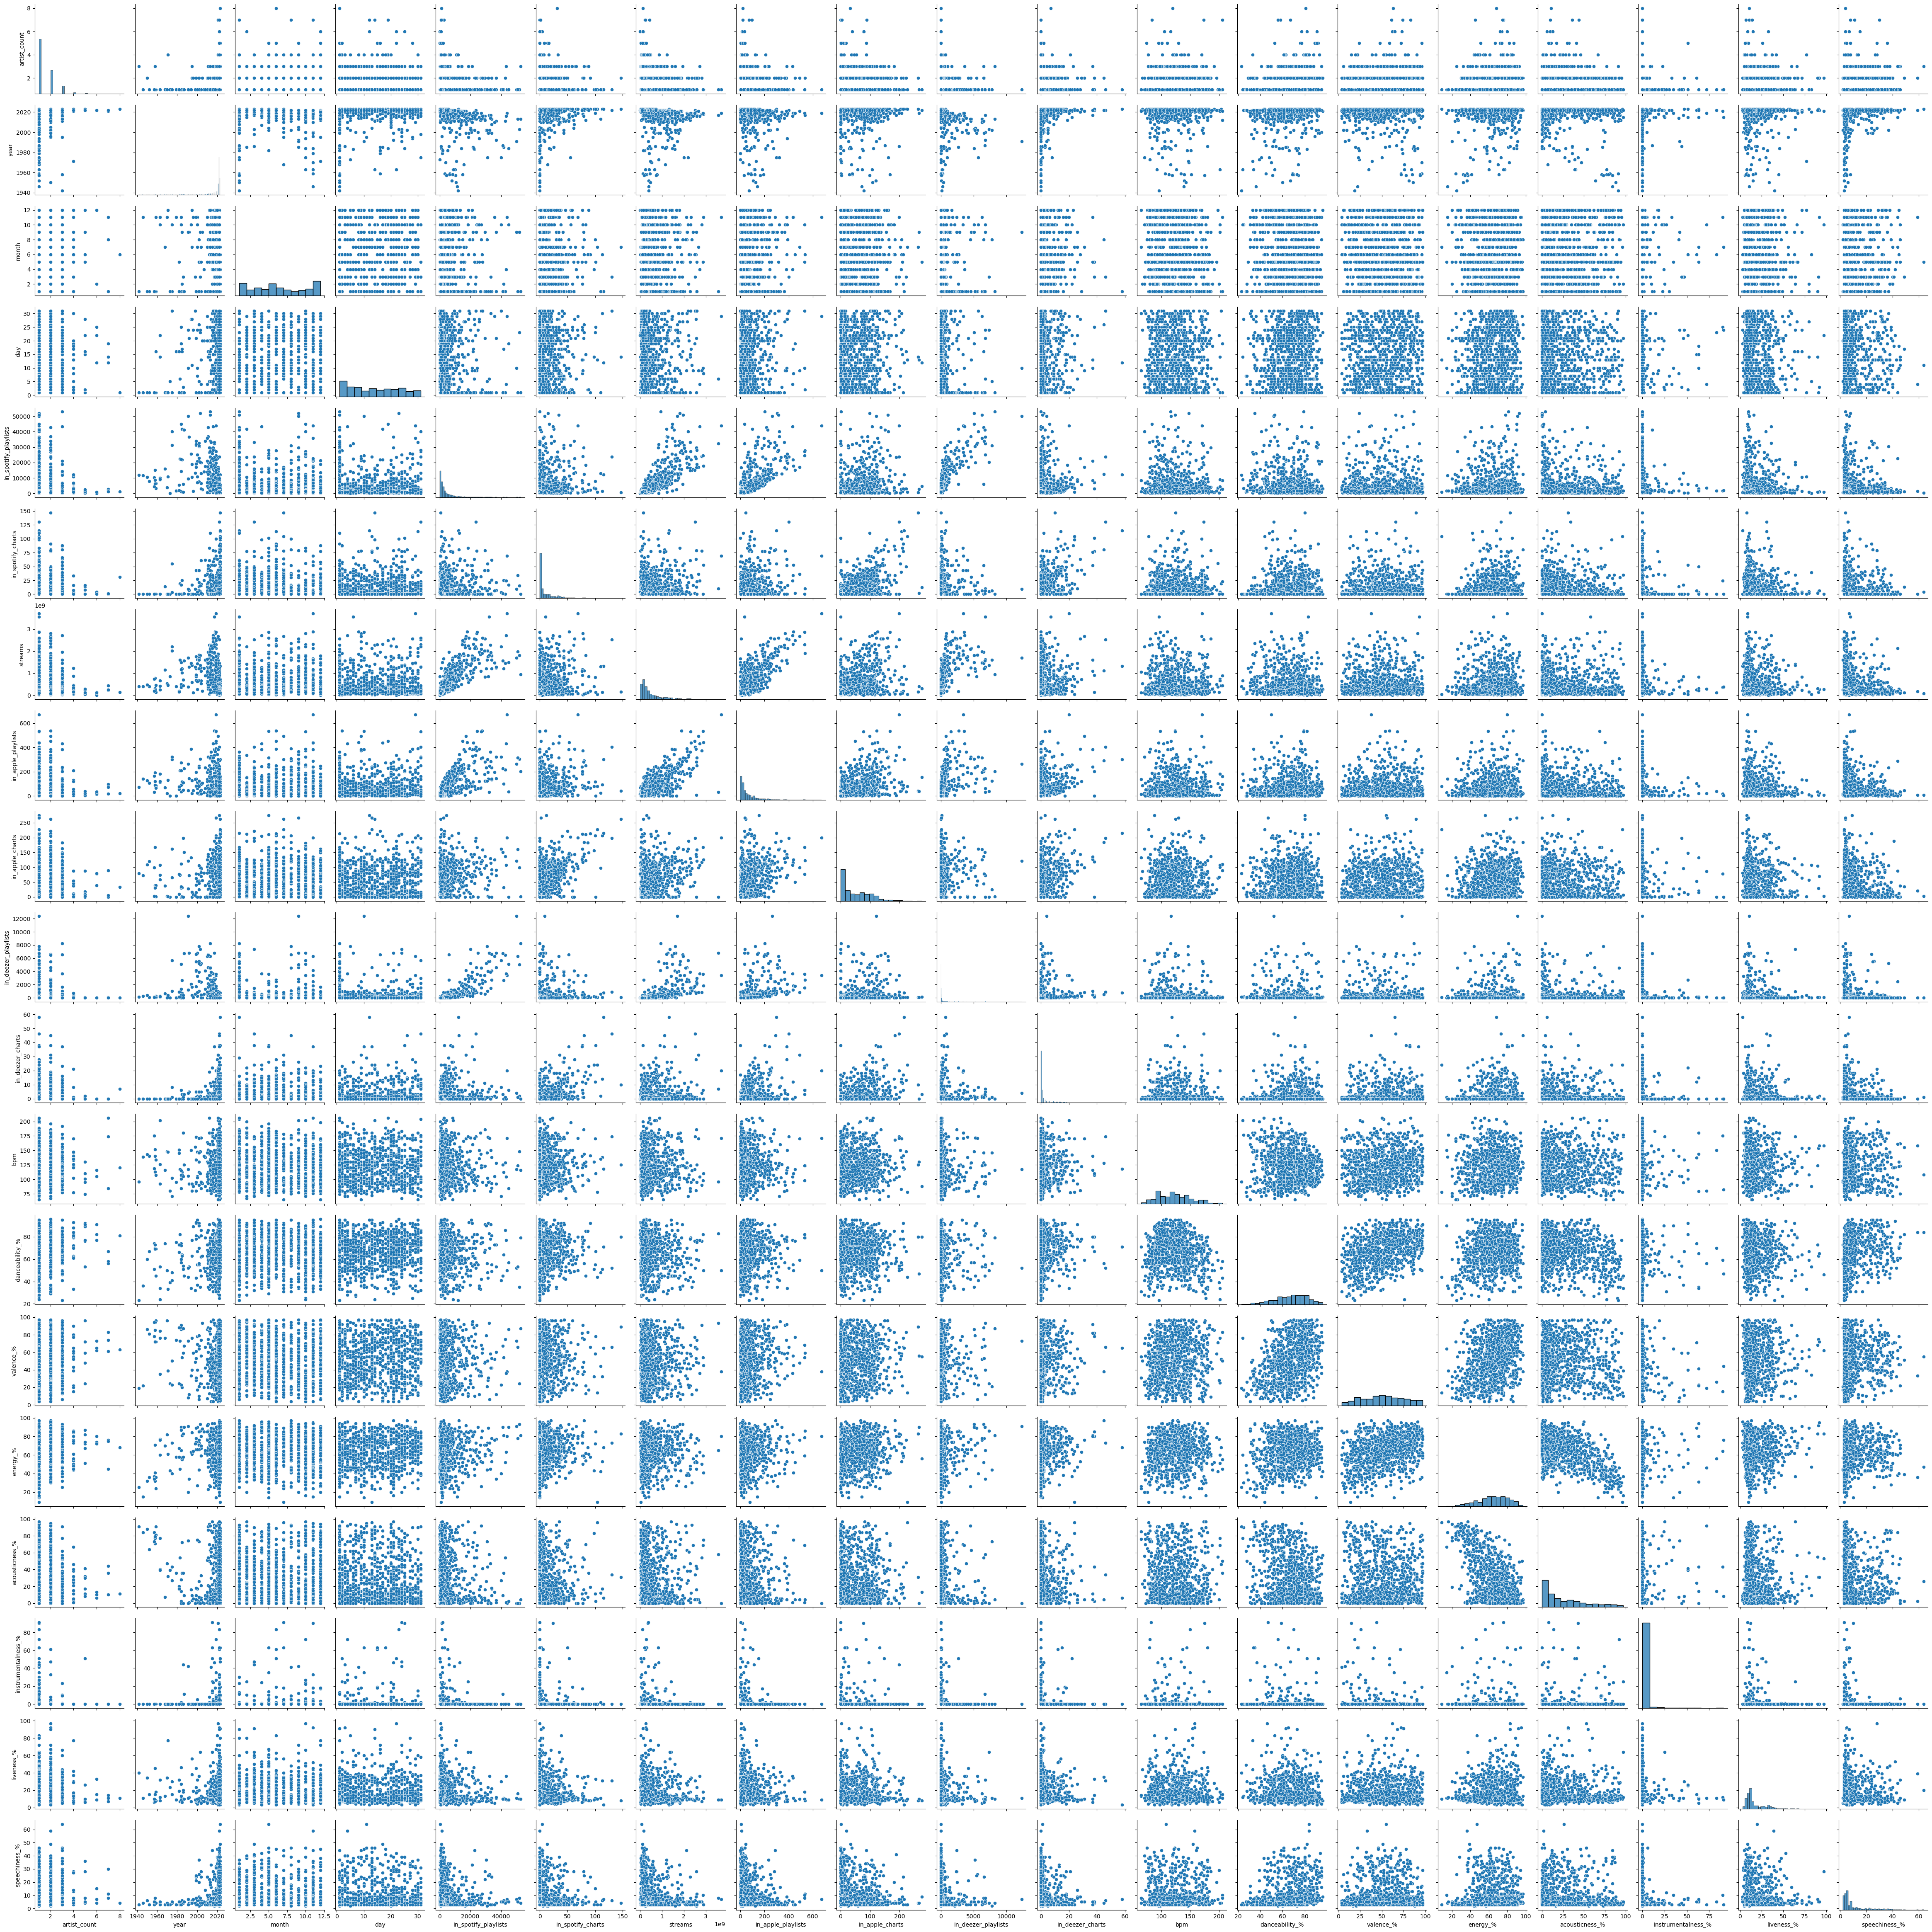

In [85]:
sns.pairplot(df_int_features);
plt.show()

Remember when I said that we don't want *so much* information that we muddy up the analysis. This 19x19 collection of scatter plots looks a bit muddy. It's time to organize our variables into their respective categories. Namely, we have our target variable: streams. We have several musical features, several columns that pertain to playlist and chart count, a few date fields, and an artist count variable that is somewhat on its own in terms of grouping with similar features. Let's especially take a look at our target variable, as well as the playlist/chart features, and the music features.

### Target Variable

Our target variable is the dependent variable, streams.

In [86]:
df.streams.sort_values(ascending=False).head(40)

55     3703895074
178    3562543890
86     2887241814
613    2864791672
41     2808096550
161    2713922350
84     2665343922
139    2594040133
718    2591224264
48     2565529693
137    2559529074
71     2557975762
14     2513188493
686    2484812918
323    2420461338
127    2355719893
126    2322580122
404    2303033973
614    2288695111
73     2282771485
678    2280566092
754    2236667932
717    2204080728
710    2197010679
627    2159346687
188    2135158446
186    2132335812
755    2123309722
616    2086124197
156    2011464183
80     2009094673
713    1970673297
125    1953533826
324    1947371785
665    1929770265
400    1897517891
507    1887039593
529    1858144199
172    1840364617
295    1829992958
Name: streams, dtype: int64

The 31 most streamed songs of 2023 all have over 2 bilion streams. Our target is to generate over 300 million streams, as this would put our songs in the upper half of the data.

In [87]:
streams_over_300M = len(df.streams[df.streams >= 300_000_000])
streams_over_300M

461

In [88]:
print(f'{round(streams_over_300M/len(df)*100)}% of the songs have over 300 million streams.')

49% of the songs have over 300 million streams.


In [89]:
df['streams'].describe()

count    9.450000e+02
mean     5.156784e+08
std      5.681818e+08
min      1.365184e+06
25%      1.420953e+08
50%      2.908332e+08
75%      6.738011e+08
max      3.703895e+09
Name: streams, dtype: float64

As we did during data wrangling, let's take a look at how each of the features correlates with 'streams'.

In [90]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'streams', data=df, alpha=0.5)
        ax.set(xlabel=col, ylabel='streams')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

#Function derived from Capstone 1 exploratory analysis

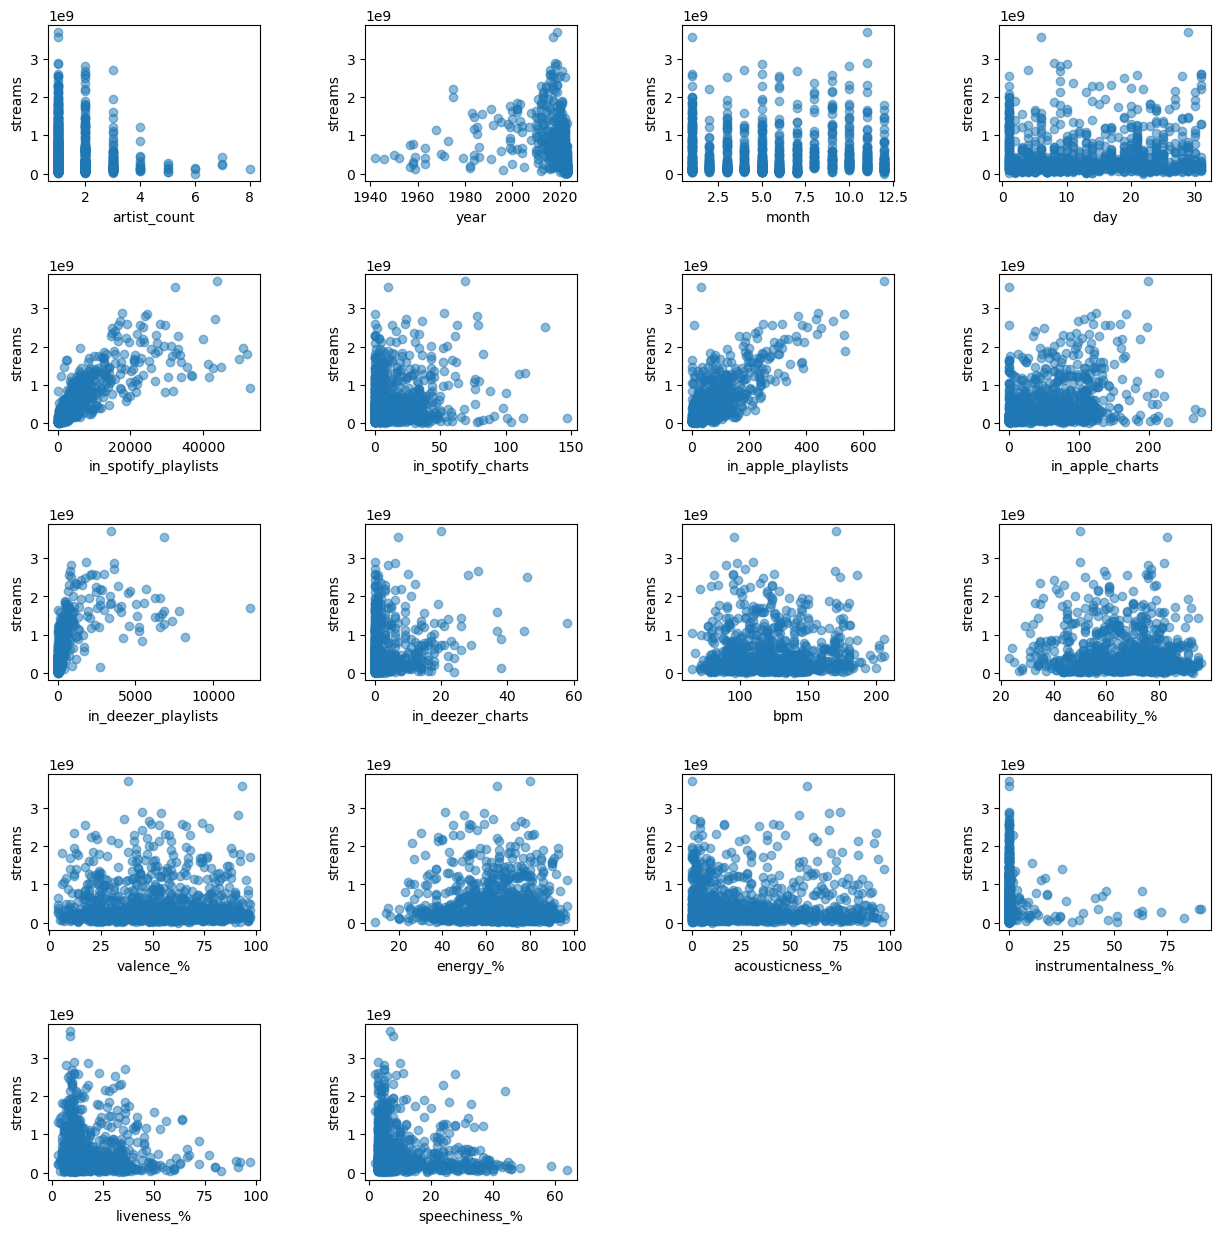

In [91]:
scatterplots(features, ncol=4, figsize=(15, 15))

Right off the bat, there are some interesting takeaways. As highlighted in our heat map, there appears to be a clear positive correlation between the number of playlists a song is included in (across Spotify, Apple, and Deezer), and the number of streams the song generates. This reiterates that getting our selected songs playlisted might be an important factor in accumulating more streams. As far as the musical features go, the linear correlations are less pronounced, but we can notice the slight negative correlations between streams and acousticness, liveness, and speechiness. This could suggest that we should pick songs that are higher energy but lower in these other three features. Could this be an upbeat electronic song with high production quality that has simple lyrics? We also note that the vast majority of songs have a low level of instrumentalness.

### Playlists and Charts

We'll now look specifically at the features that relate to playlists and charts, and include our stream variable in the exploration.

In [92]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'release_date'],
      dtype='object')

In [93]:
df_playchart = df[['streams', 'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists', 
                   'in_spotify_charts', 'in_apple_charts', 'in_deezer_charts']]

In [94]:
df_playchart.head()

streams  in_spotify_playlists  in_apple_playlists  in_deezer_playlists  \
0  141381703                   553                  43                   45   
1  133716286                  1474                  48                   58   
2  140003974                  1397                  94                   91   
3  800840817                  7858                 116                  125   
4  303236322                  3133                  84                   87   

   in_spotify_charts  in_apple_charts  in_deezer_charts  
0                147              263                10  
1                 48              126                14  
2                113              207                14  
3                100              207                12  
4                 50              133                15

In [95]:
df_playchart.corr()

streams  in_spotify_playlists  in_apple_playlists  \
streams               1.000000              0.790111            0.772846   
in_spotify_playlists  0.790111              1.000000            0.707696   
in_apple_playlists    0.772846              0.707696            1.000000   
in_deezer_playlists   0.598273              0.826300            0.471434   
in_spotify_charts     0.246114              0.163255            0.231738   
in_apple_charts       0.322217              0.270575            0.413571   
in_deezer_charts      0.229407              0.143836            0.368561   

                      in_deezer_playlists  in_spotify_charts  in_apple_charts  \
streams                          0.598273           0.246114         0.322217   
in_spotify_playlists             0.826300           0.163255         0.270575   
in_apple_playlists               0.471434           0.231738         0.413571   
in_deezer_playlists              1.000000           0.087386         0.172845   
in_spotify_charts                0.087386           1.000000         0.550940   
in_apple_charts                  0.172845           0.550940         1.000000   
in_deezer_charts                 0.066037           0.599563         0.381797   

                      in_deezer_charts  
streams                       0.229407  
in_spotify_playlists          0.143836  
in_apple_playlists            0.368561  
in_deezer_playlists           0.066037  
in_spotify_charts             0.599563  
in_apple_charts               0.381797  
in_deezer_charts              1.000000

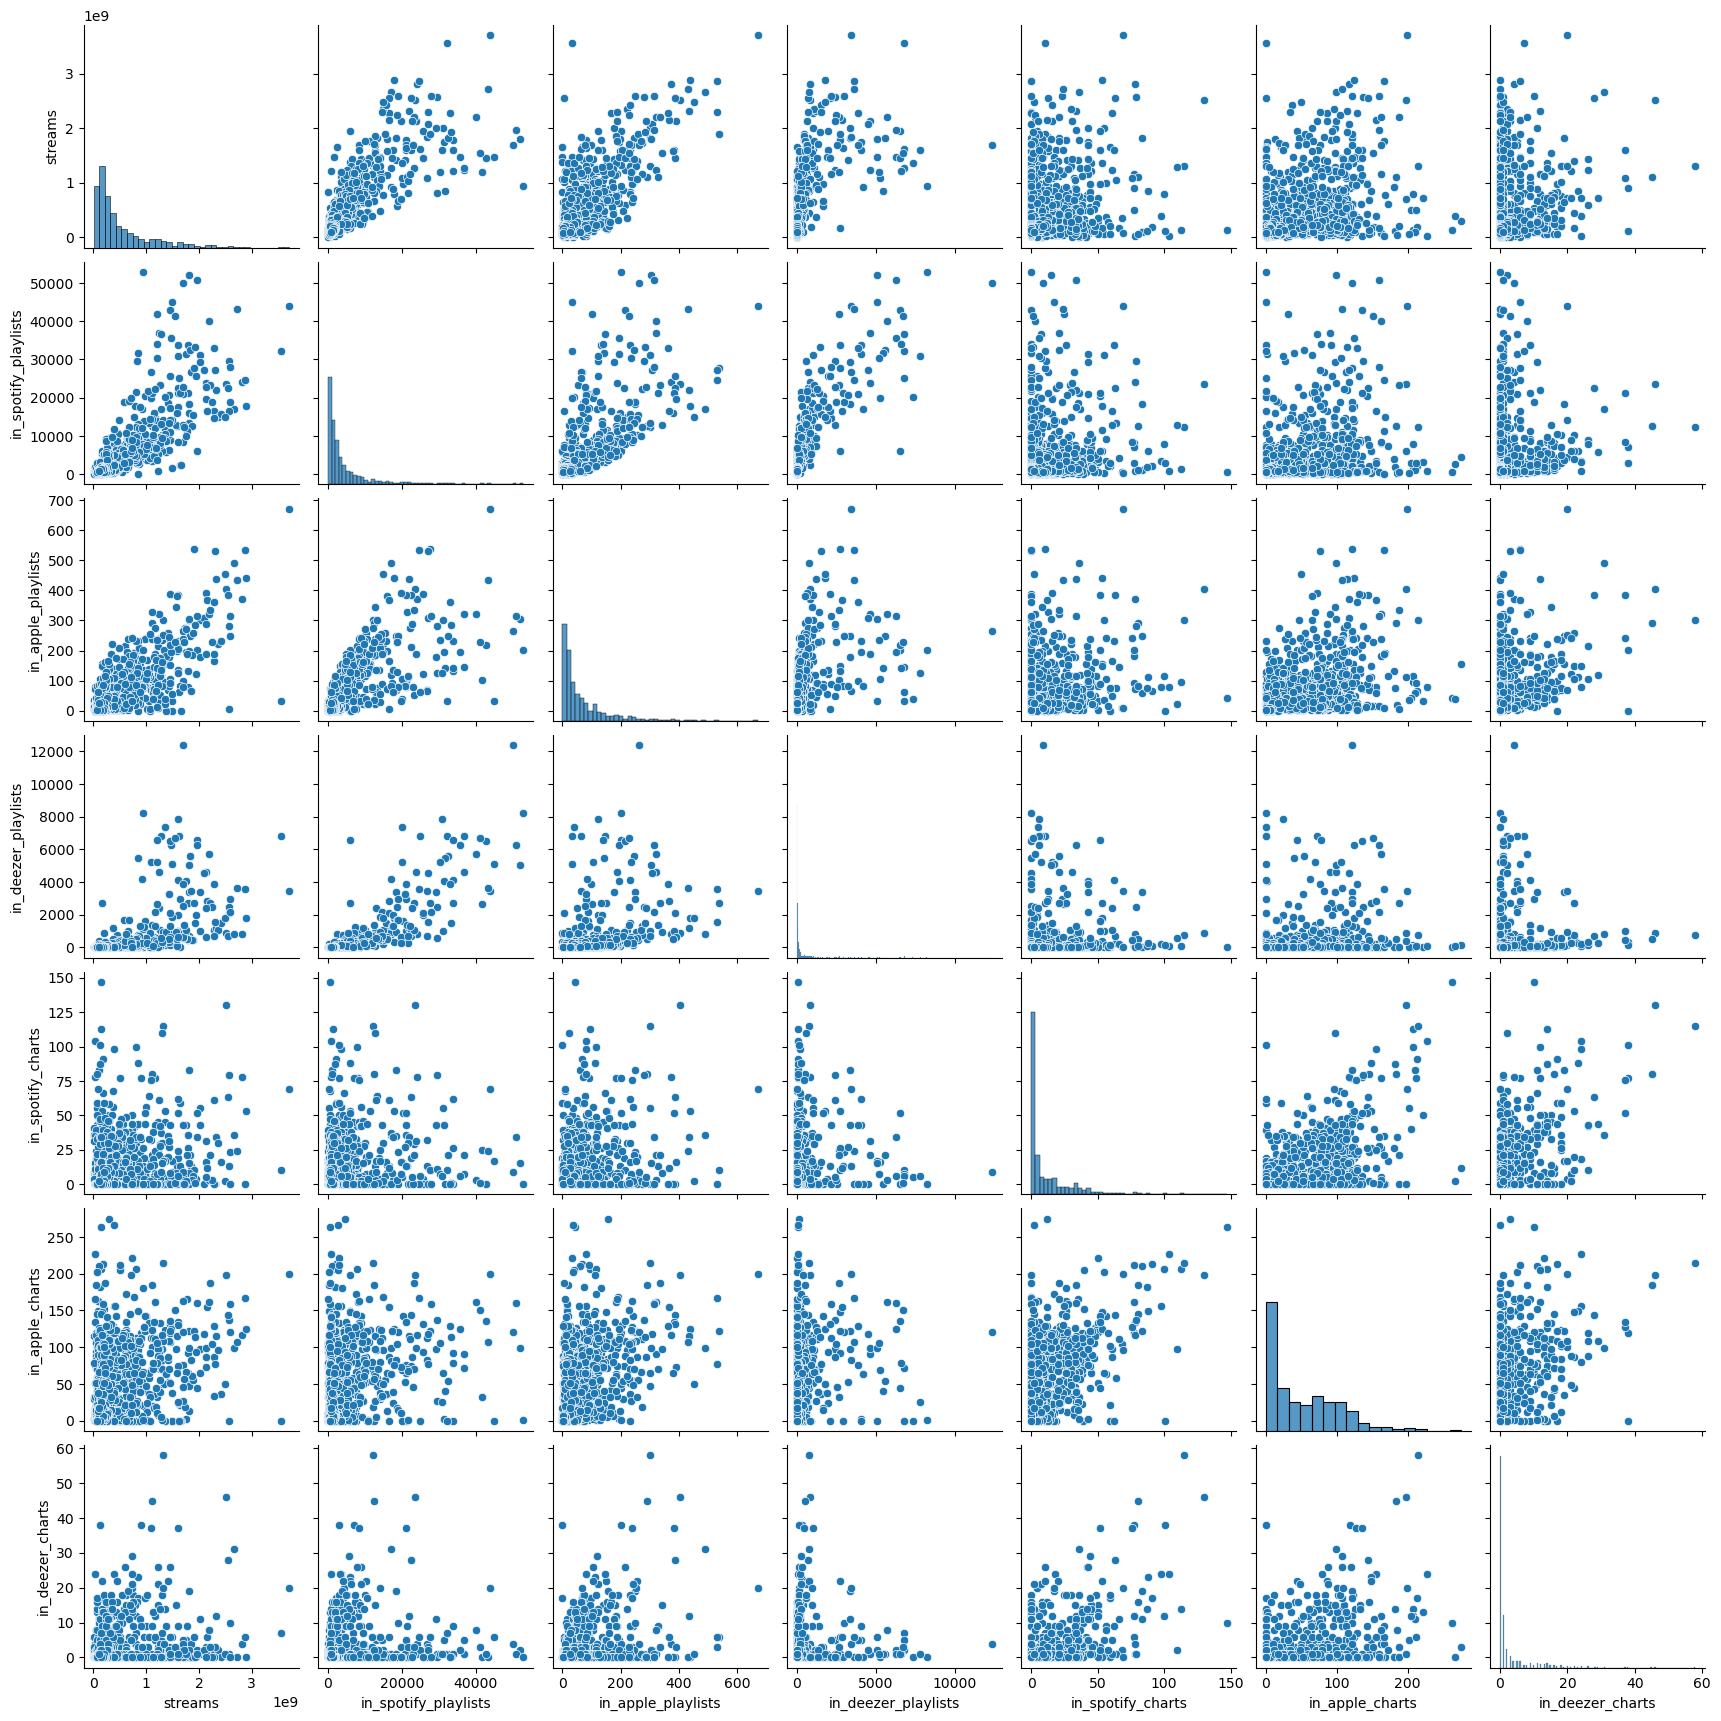

In [96]:
sns.pairplot(df_playchart);
plt.show()

That's a bit easier to visualize. Again we see that number of streams has a stronger positive correlates with how many playlists the song is featured in, than the number of charts that the song is in. Moreover, a song in more Spotify playlists, tends to be in more Apple playlists, and in more Deezer playlists. We could consider consolidating the three platforms into one column, and doing the same fo charts. We could then see what proportion of total playlists are comprised by each platform.

In [97]:
df_playchart['total_playlists'] = df_playchart.iloc[:,1:4].sum(axis=1)

In [98]:
df_playchart['total_charts'] = df_playchart.iloc[:,4:7].sum(axis=1)

In [99]:
df_playchart.head()

streams  in_spotify_playlists  in_apple_playlists  in_deezer_playlists  \
0  141381703                   553                  43                   45   
1  133716286                  1474                  48                   58   
2  140003974                  1397                  94                   91   
3  800840817                  7858                 116                  125   
4  303236322                  3133                  84                   87   

   in_spotify_charts  in_apple_charts  in_deezer_charts  total_playlists  \
0                147              263                10              641   
1                 48              126                14             1580   
2                113              207                14             1582   
3                100              207                12             8099   
4                 50              133                15             3304   

   total_charts  
0           420  
1           188  
2           334  
3           319  
4           198

In [100]:
all_total_playlists = df_playchart['total_playlists'].sum(axis=0)

all_spotify_playlists = df_playchart['in_spotify_playlists'].sum(axis=0)
all_apple_playlists = df_playchart['in_apple_playlists'].sum(axis=0)
all_deezer_playlists = df_playchart['in_deezer_playlists'].sum(axis=0)

spotify_playlist_prop = round(all_spotify_playlists/all_total_playlists*100)
apple_playlist_prop = round(all_apple_playlists/all_total_playlists*100)
deezer_playlist_prop = round(all_deezer_playlists/all_total_playlists*100)

print(f'Spotify accounts for {spotify_playlist_prop}% of total playlist appearances.')
print(f'Apple accounts for {apple_playlist_prop}% of total playlist appearances.')
print(f'Deezer accounts for {deezer_playlist_prop}% of total playlist appearances.')

Spotify accounts for 92% of total playlist appearances.
Apple accounts for 1% of total playlist appearances.
Deezer accounts for 7% of total playlist appearances.


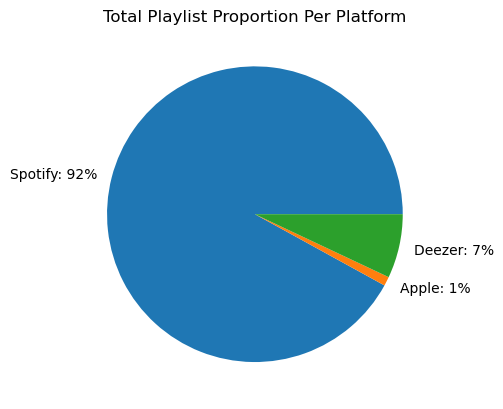

In [101]:
plt.pie([spotify_playlist_prop, apple_playlist_prop, deezer_playlist_prop], labels=['Spotify: 92%', 'Apple: 1%', 'Deezer: 7%']);
plt.title('Total Playlist Proportion Per Platform');

In [102]:
all_total_charts = df_playchart['total_charts'].sum(axis=0)

all_spotify_charts = df_playchart['in_spotify_charts'].sum(axis=0)
all_apple_charts = df_playchart['in_apple_charts'].sum(axis=0)
all_deezer_charts = df_playchart['in_deezer_charts'].sum(axis=0)

spotify_chart_prop = round(all_spotify_charts/all_total_charts*100)
apple_chart_prop = round(all_apple_charts/all_total_charts*100)
deezer_chart_prop = round(all_deezer_charts/all_total_charts*100)

print(f'Spotify accounts for {spotify_chart_prop}% of total chart appearances.')
print(f'Apple accounts for {apple_chart_prop}% of total chart appearances.')
print(f'Deezer accounts for {deezer_chart_prop}% of total chart appearances.')

Spotify accounts for 18% of total chart appearances.
Apple accounts for 78% of total chart appearances.
Deezer accounts for 4% of total chart appearances.


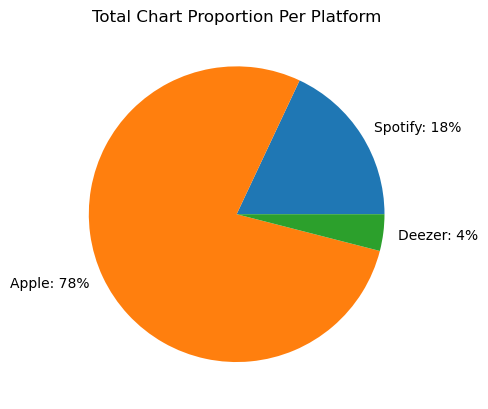

In [103]:
plt.pie([spotify_chart_prop, apple_chart_prop, deezer_chart_prop], labels=['Spotify: 18%', 'Apple: 78%', 'Deezer: 4%']);
plt.title('Total Chart Proportion Per Platform');

Songs in the dataset are in far more Spotify playlists than Apple or Deezer playlists, and in far more Apple charts than Spotify or Deezer charts. Moreover, inclusion in Spotify playlists has a stronger positive correlation with streams than inclusion in Apple or Deezer playlists, and likewise, inclusion in Apple charts correlates more strongly with streams than inclusion in Spotify or Deezer charts. Should we consider only using the Spotify playlist and Apple chart columns to represent all of the playlist and chart columns respectively? Or perhaps we could use the consolidated total playlist and chart columns. Either of these options would reduce our total feature count, thus simplifying some of the complexity of our suite of input variables when it comes time for modeling. We'll keep these in mind when we cross that bridge. But we'll also remember that we may ultimately choose to focus soley on music feature variables, and exclude the playlist and chart information altogether. Nevertheless, it is useful to understand the spread of these features per platform in our dataset, as this provides us with a more comprehensive view of the features associated with top-streamed songs. If anything, we can tell that an additional goal after choosing our songs will be to promote playlisting, particularly on Spotify, and charting, particularly on Apple. Moreover, further analysis might even seek to model these variables as our dependent variables, as they in and of themselves might lead to higher stream count. For now, we'll move on to a zoomed in view of our music features. But first, while we're here, let's look at one final consideration about playlist and chart information: combining these two fields into one aggregate field.

In [104]:
all_playchart = all_total_playlists + all_total_charts

spotify_playchart_prop = round((all_spotify_playlists + all_spotify_charts)/all_playchart*100)
apple_playchart_prop = round((all_apple_playlists + all_apple_charts)/all_playchart*100)
deezer_playchart_prop = round((all_deezer_playlists + all_deezer_charts)/all_playchart*100)

print(f'Spotify accounts for {spotify_playchart_prop}% of total combined playlist and chart appearances.')
print(f'Apple accounts for {apple_playchart_prop}% of total combined playlist and chart appearances.')
print(f'Deezer accounts for {deezer_playchart_prop}% of total combined playlist and chart appearances.')

Spotify accounts for 91% of total combined playlist and chart appearances.
Apple accounts for 2% of total combined playlist and chart appearances.
Deezer accounts for 7% of total combined playlist and chart appearances.


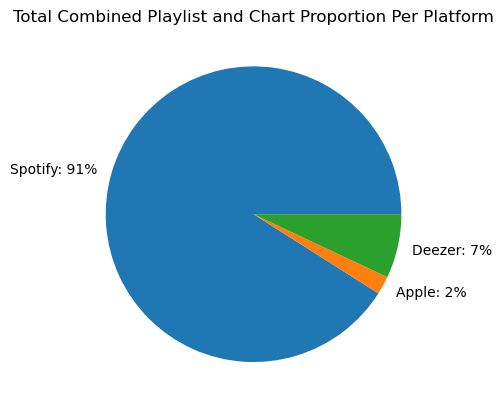

In [105]:
plt.pie([spotify_playchart_prop, apple_playchart_prop, deezer_playchart_prop], labels=['Spotify: 91%', 'Apple: 2%', 'Deezer: 7%']);
plt.title('Total Combined Playlist and Chart Proportion Per Platform');

This demonstrates how many more playlist appearances there are than chart appearances. When aggregating these fields, the playlist feature essentially drowns out the chart feature. As indicated in our correlation matrix, playlist features have a stronger correlation with streams than chart features have with streams. Should we include any of these features in our model, the playlist features seem more relevant. And considering Spotify's large weight of the proportion and the fact that our target is to generate streams *on* Spotify, the 'in_spotify_playlists' column may be our most valuable feature of this subset of the data. Possibly even more imperative to our analysis, let's look at the music features.

### Music Features

Since our goal is to select songs from our catalog that are most likely to generate more streams, we primarily anticipate that the musical quality of the song will be most important to this analysis. While getting the songs in playlists and charts on streaming services will likely help to create more streams, these factors occur after the songs are selected, whereas the song selection itself should depend on the sonic quality of the songs, and how strongly these associate with songs from the past year that had the highest stream count. We'll create a subset dataframe to look more closely at these features, and include the streams feature since it is our target variable, as well as the in Spotify playlists feature, as this might be an alternative target variable to consider for additional analysis.

In [106]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'release_date'],
      dtype='object')

In [107]:
music_features = ['streams', 'in_spotify_playlists', 'bpm', 'danceability_%', 'valence_%', 
                  'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [108]:
df_music_features = df[music_features]

For visual cleanliness, we'll truncate some of the column names. We know that the music features refer to a percentage, and that the playlist feature here refers to Spotify, so we don't need to include these specifications in our column titles.

In [109]:
def simplify_labels(dataframe):
    dataframe.columns = dataframe.columns.str.replace('_%', '')
    dataframe.rename(columns={'in_spotify_playlists':'playlists'}, inplace=True)

In [110]:
simplify_labels(df_music_features)

In [111]:
df_music_features.head()

streams  playlists  bpm  danceability  valence  energy  acousticness  \
0  141381703        553  125            80       89      83            31   
1  133716286       1474   92            71       61      74             7   
2  140003974       1397  138            51       32      53            17   
3  800840817       7858  170            55       58      72            11   
4  303236322       3133  144            65       23      80            14   

   instrumentalness  liveness  speechiness  
0                 0         8            4  
1                 0        10            4  
2                 0        31            6  
3                 0        11           15  
4                63        11            6

In [112]:
df_music_features.corr()

streams  playlists       bpm  danceability   valence  \
streams           1.000000   0.790111 -0.002077     -0.108141 -0.041051   
playlists         0.790111   1.000000 -0.019128     -0.108645 -0.021071   
bpm              -0.002077  -0.019128  1.000000     -0.144866  0.041473   
danceability     -0.108141  -0.108645 -0.144866      1.000000  0.411362   
valence          -0.041051  -0.021071  0.041473      0.411362  1.000000   
energy           -0.024760   0.035201  0.029735      0.199980  0.359281   
acousticness     -0.005894  -0.066833 -0.018467     -0.239157 -0.081418   
instrumentalness -0.044275  -0.027179 -0.004418     -0.090760 -0.133694   
liveness         -0.051115  -0.046932 -0.003607     -0.079995  0.021063   
speechiness      -0.113346  -0.091041  0.040483      0.186315  0.043199   

                    energy  acousticness  instrumentalness  liveness  \
streams          -0.024760     -0.005894         -0.044275 -0.051115   
playlists         0.035201     -0.066833         -0.027179 -0.046932   
bpm               0.029735     -0.018467         -0.004418 -0.003607   
danceability      0.199980     -0.239157         -0.090760 -0.079995   
valence           0.359281     -0.081418         -0.133694  0.021063   
energy            1.000000     -0.577361         -0.037511  0.117908   
acousticness     -0.577361      1.000000          0.043859 -0.049037   
instrumentalness -0.037511      0.043859          1.000000 -0.044325   
liveness          0.117908     -0.049037         -0.044325  1.000000   
speechiness      -0.004391     -0.024064         -0.083171 -0.021562   

                  speechiness  
streams             -0.113346  
playlists           -0.091041  
bpm                  0.040483  
danceability         0.186315  
valence              0.043199  
energy              -0.004391  
acousticness        -0.024064  
instrumentalness    -0.083171  
liveness            -0.021562  
speechiness          1.000000

In [113]:
#sns.pairplot(df_music_features);
#plt.show()

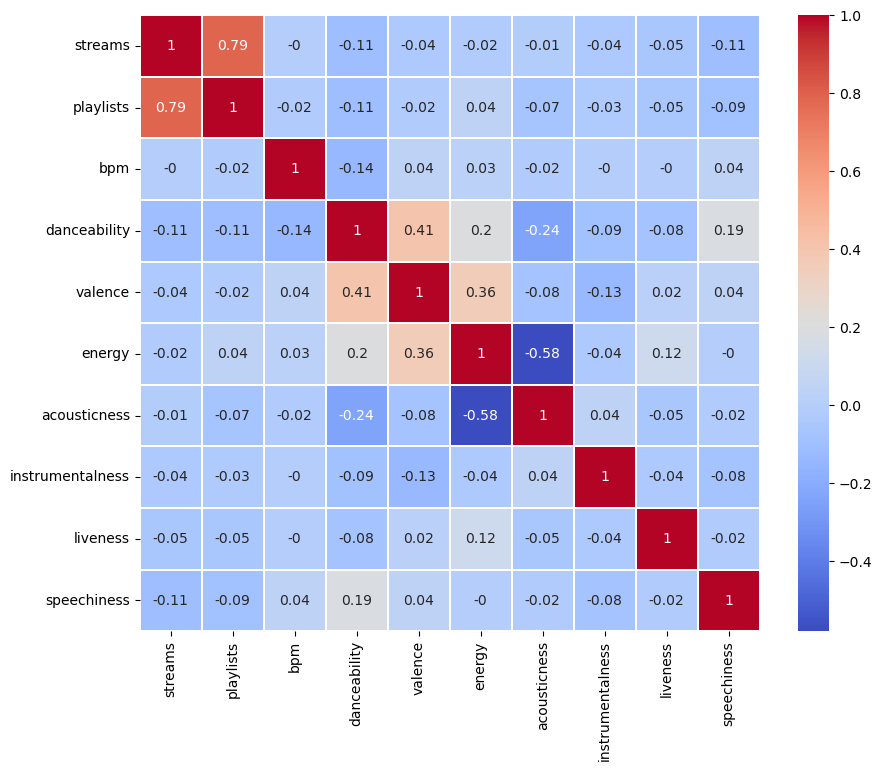

In [114]:
plt.figure(figsize=(10,8))
heat_all = sns.heatmap(round(df_music_features.corr(),2),linewidths=.1,cmap='coolwarm', annot=True)
heat_all = plt.yticks(rotation=0);

Here we get a clearer view of how the music features relate to one another as well as how they relate to streams and playlists.

Strongest positive correlations betweeen music features:

- danceability and valence: 0.41
- valence and enegy: 0.36
- danceability and energy: 0.2

Strongest negative correlations between music features:

- energy and acousticness: -0.58
- danceability and acousticness: -0.24

Most importantly, so we presume, we want to look at how these music features correlate with streams, and perhaps playlists. Here danceability has a slight negative correlation with both, as does speechiness. In fact, all of the music features have slight negative correlations with both streams and playlists (albeit more slight than those that speechiness and danceability have with streams and playlists), except for energy which has a slight positive correlation with playlists. Interestingly, energy has a slight negative correlation with streams, even though streams and playlists are positively correlated with one another. Given that we left out our mode column, let's look at the same correlations for two different subsets of the data: songs that are Major vs. songs that are minor.

In [115]:
df_Major = df[df['mode'] == 1]
df_Major = df_Major[music_features]
simplify_labels(df_Major)

In [116]:
df_minor = df[df['mode'] == 0]
df_minor = df_minor[music_features]
simplify_labels(df_minor)

In [117]:
print(df_Major.shape)
print(df_minor.shape)

(544, 10)
(401, 10)


In [118]:
def sideplots(df1, df2, title1, title2):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
    plt.subplots_adjust(wspace=0.3)
    sns.heatmap(round(df1.corr(),2),linewidths=.1,cmap='coolwarm', annot=True, ax=ax1, cbar=False)
    sns.heatmap(round(df2.corr(),2),linewidths=.1,cmap='coolwarm', annot=True, ax=ax2, cbar=False)
    ax1.title.set_text(title1)
    ax2.title.set_text(title2)
    plt.show()

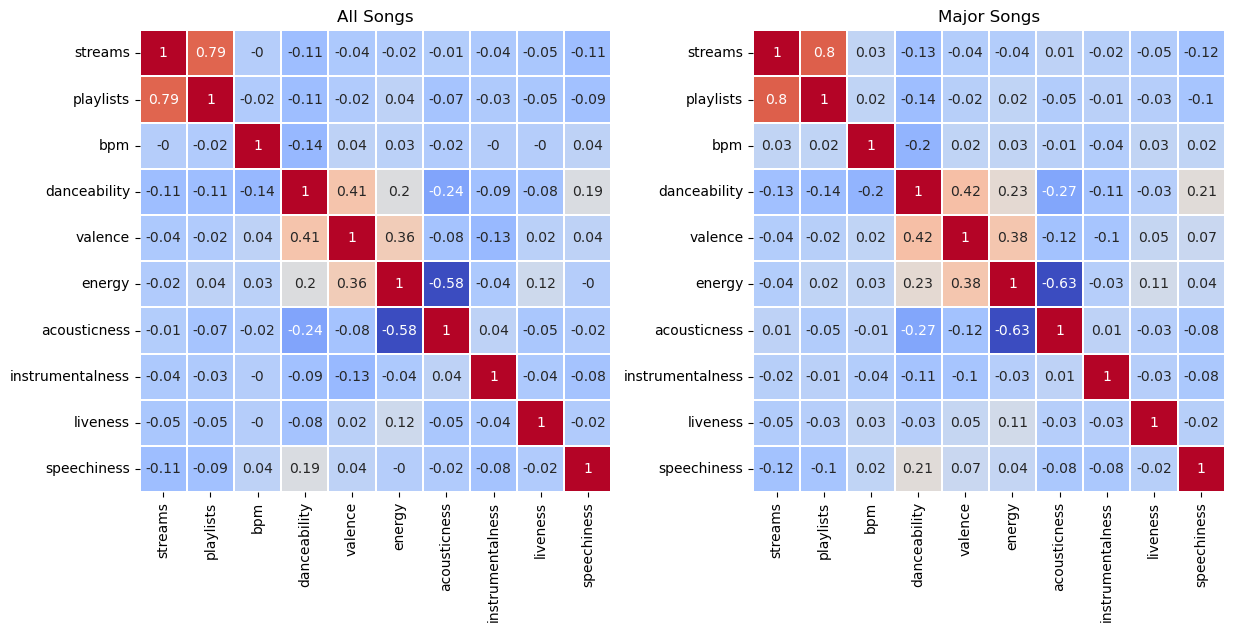

In [119]:
sideplots(df_music_features, df_Major, 'All Songs', 'Major Songs')

Here we see that several of the correlations are a bit stronger, such as the positive correlations between danceability and valence, danceability and energy, danceability and speechiness, and energy and valence, as well as the negative correlations between energy and acousticness, and danceability and acousticness. Additionally we can see that a few of the correlations between streams and music features have shifted, with Major songs tending to have more positive correlations between streams and bpm, and streams and acousticness, and more negative correlations between streams and speechiness, streams and energy, and streams and danceability. These shifts are slight but are worth noting.

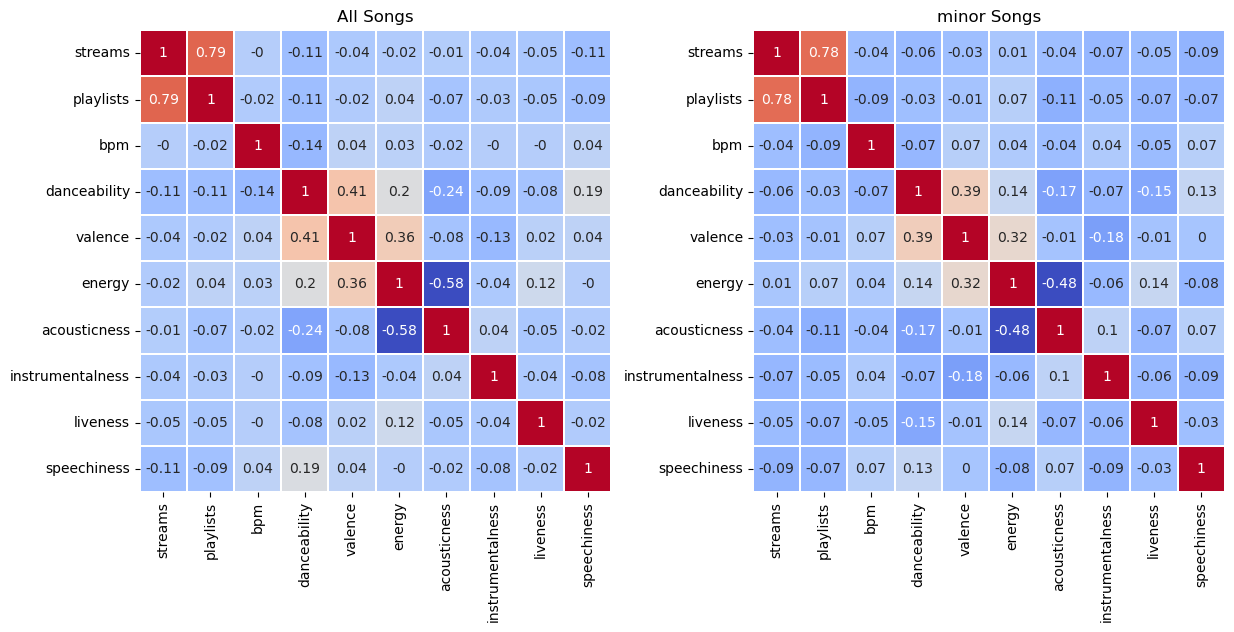

In [120]:
sideplots(df_music_features, df_minor, 'All Songs', 'minor Songs')

Interestingly, here we see some of the opposite shifts in correlation than we saw when comparing all songs with strictly Major songs. When comparing all songs with minor songs, we see that the positive correlations between danceability and valence, danceability and energy, danceability and speechiness, and energy and valence, have all weakened, and that the negative correlation between acousticness and energy, and acousticness and danceability, have also weakened. As far as how the music features correlate with streams, the minor songs have stronger negative correlations between acousticness and streams,  instrumentalness and streams, and bpm and streams, and have a slightly positive correlation between energy and streams, as opposed to slightly negative for all songs. Again, these correlational shifts are slight, but examining and weighing the relevance of the intricacies of our data is what exploratory data analysis is all about!

We've seen how each of our music features correlate with stream count, as well as Spotify playlist inclusion count, and that these correlations are slightly different between Major and minor songs. Finally, let's take a look at how total streams vary between Major and minor songs.

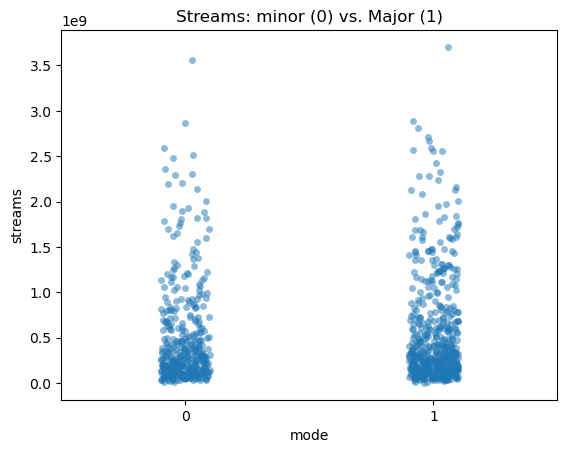

In [121]:
sns.stripplot(data=df, x='mode', y='streams', alpha=0.5);
plt.title('Streams: minor (0) vs. Major (1)');
plt.show()

It's hard to tell if there's much of a difference between number of streams garnered by Major or minor songs. The two look fairly even, with Major songs possibly drawing a slightly higher stream count than minor songs, which is not a surprise given that there are more Major songs in the dataset.

## Save Data for Preprocessing

We've reviewed a variety of aspects of our data and how they relate to one another. Now it's time to make some official decisions on which features we will use for preprocessing, training, and modeling. Let's start by looking at the features we have availalbe.

In [122]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'year', 'month', 'day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'bpm', 'mode', 'danceability_%', 'valence_%',
       'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
       'speechiness_%', 'release_date'],
      dtype='object')

Let's remind ourselves: what is our business goal? Answer: determine which musical features relate to stream count, so that we might pick songs with similar features and that therefore have a higher likelihood of generating more streams (target of 300M). Given this, we can exclude many of the features listed above, and only focus on those that are most relevant. 

All of the date data aren't necessary to this particular analysis, as we know that we will be releasing the songs this year, though it may be helpful to reference these upon release planning so that we might select an optimum month for release. We also can exclude all of the playlist and chart information, as these are moreso dependent variables as related to our study. Additionally, let's forget about the 'artist_count' feature, as this isn't particularly relevant to reflecting the sonic qualities of each song. Thus, our features of importance are 'bpm' and all columns thereafter, excepting the final column of release date. Let's save a dataframe with our specific music features and our target variable, as well as a dataframe with the track and artist(s) name, as well as release date as a reference.

In [123]:
df_music_features.columns

Index(['streams', 'playlists', 'bpm', 'danceability', 'valence', 'energy',
       'acousticness', 'instrumentalness', 'liveness', 'speechiness'],
      dtype='object')

In [124]:
df_reference = df[['track_name', 'artist(s)_name', 'release_date']]
df_reference.head()

track_name    artist(s)_name release_date
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook   2023-07-14
1                                 LALA       Myke Towers   2023-03-23
2                              vampire    Olivia Rodrigo   2023-06-30
3                         Cruel Summer      Taylor Swift   2019-08-23
4                       WHERE SHE GOES         Bad Bunny   2023-05-18

In [125]:
df_reference.shape

(945, 3)

In [127]:
df = pd.concat([df_music_features.drop(columns='playlists'), df[['mode']]], axis=1)
df.head()

streams  bpm  danceability  valence  energy  acousticness  \
0  141381703  125            80       89      83            31   
1  133716286   92            71       61      74             7   
2  140003974  138            51       32      53            17   
3  800840817  170            55       58      72            11   
4  303236322  144            65       23      80            14   

   instrumentalness  liveness  speechiness  mode  
0                 0         8            4     1  
1                 0        10            4     1  
2                 0        31            6     1  
3                 0        11           15     1  
4                63        11            6     0

In [128]:
df.shape

(945, 10)

In [129]:
df_reference.to_csv('spotify_2023_reference.csv')
df.to_csv('spotify_2023_streams_and_features.csv')

## Summary

Regression Records seeks to identify which musical features most strongly associate with generating more streams, so as to make an informed decision on which songs to to pick from its catalog to promote this upcoming year. Using a dataset of the top streamed songs of 2023, we looked a variety of features of the data. First we explored distributions via histograms and saw that many of the features were right skewed. Box plots confirmed that the data contain quite a few outliers. This begs the question as to how a model might perform differently if it were fit to a train split of the whole dataset vs. a train split of a subset of the dataset based on the interquartile range. An unexpected observation from the distribution was that the times of month and year that a song from the dataset was released, tended to cluster more highly around the beginning of a month, and the beginning or end of a year. This could be a helpful insight into planning the release dates of our selected songs.

We also examined correlations amongst the variables, and found that streams most strongly correlated with playlist inclusion. By looking specifically at the playlist and chart inclusion columns, we found that Spotify held the primary proportion of playlist inclusions in our data, and Apple had the primary proportion of chart inclusions. Given that playlist counts highly outweighed chart counts, combining these features proved Spotify to hold the overall largest proportion of this subset of the data. While we may choose not to train our model based on playlist and chart features, as the music features are really what we're seeking to discern, a key takeaway from this portion of the analysis is that a valuable marketing strategy might be to attempt to get our selected songs into more Spotify playlists.

Finally, we examined the music features as they relate to one another, as well as how they relate to total streams and inclusion in Spotify playlists. Correlation matrices, pair plots, and especially heat maps, helped illustrate how these variables interrelate with one another. The strongest positive correlations between music features were: danceability and valence, valence and enegy, and danceability and energy. The strongest negative correlations between music features were energy and acousticness, and danceability and acousticness. Though the linear correlations between music features and streams didn't appear significant, we did notice that they were generally slightly stronger for Major songs, and slightly weaker for minor songs, as compared to the combined data of Major and minor songs.

Exploratory data analysis often leaves us with more questions than we began with, and the process can prove cyclical and continuous. Do songs in 2023 have different tendencies in music features than songs from previous years? Did the musical tendencies change throughout the year? Such insights might help us predict musical trends to consider in selecting our songs based on the relevant musical features. Additionally, we could seek to understand which variables account for the greatest proportion of variance in the dataset. Here, a principal component analysis would be relevent. The breadth and depth of the exploration depend on the time available for a project, and considering that we've plenty of work ahead in preprocessing, training, and modeling, we best be diligent in moving onwards. Given the cyclical nature of EDA, we'll surely be back to further investigate questions as they arise.